In [2]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [6]:
#  3. Convert the June temperatures to a list.
temp_june = list(temp_june)

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temp_june_df = pd.DataFrame(temp_june, columns=['June Temps'])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [10]:
# 7. Convert the December temperatures to a list.
temp_dec = list(temp_dec)

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_dec = pd.DataFrame(temp_dec, columns=['December Temps'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temp_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Query for more anaysis

###  1. Statistics for Precipitation (June & December)

In [41]:
prcp_june = session.query(Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
prcp_dec = session.query(Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

In [45]:
prcp_june_df = pd.DataFrame(prcp_june, columns=['June prcps'])
prcp_dec_df = pd.DataFrame(prcp_dec, columns=['December prcps'])

In [57]:
prcp_june_df.describe()

,June prcps
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [58]:
prcp_dec_df.describe()

,December prcps
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### 2. Temperature and Precipitation for each month

In [136]:
temps = session.query(Measurement.date, func.avg(Measurement.tobs)).group_by(extract('month',Measurement.date)).all()
temps = pd.DataFrame(temps, columns=['Month','temp'])
temps

,Month,temp
0,2010-01-01,68.726115
1,2010-02-01,69.442236
2,2010-03-01,70.059067
3,2010-04-01,72.357268
4,2010-05-01,73.680900
5,2010-06-01,74.944118
6,2010-07-01,76.082408
7,2010-08-01,76.412454
8,2010-09-01,76.164865
9,2010-10-01,75.391388


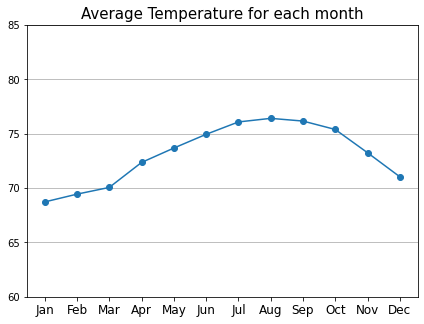

In [156]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(7,5))
plt.plot(temps['Month'], temps['temp'], marker='o')
plt.xticks(np.arange(0,12,1),labels=months, fontsize=12)
plt.grid(axis='y')
plt.yticks(np.arange(60, 90, 5))
plt.title("Average Temperature for each month", fontsize=15)
plt.show()

In [105]:
prcp = session.query(Measurement.date, func.avg(Measurement.prcp)).group_by(extract('month',Measurement.date)).all()
prcp = pd.DataFrame(prcp, columns=['Month','prcp'])
prcp

,Month,prcp
0,2010-01-01,0.129975
1,2010-02-01,0.137271
2,2010-03-01,0.204227
3,2010-04-01,0.150639
4,2010-05-01,0.145677
5,2010-06-01,0.136360
6,2010-07-01,0.167922
7,2010-08-01,0.146662
8,2010-09-01,0.164249
9,2010-10-01,0.155606


In [106]:
import matplotlib.pyplot as plt
import datetime

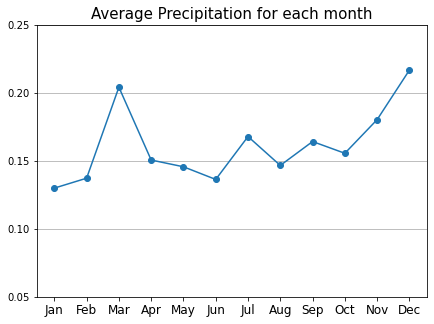

In [155]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(7,5))
plt.plot(prcp['Month'], prcp['prcp'], marker='o')
plt.xticks(np.arange(0,12,1),labels=months, fontsize=12)
plt.yticks(np.arange(0.05, 0.30, 0.05))
plt.grid(axis='y')
plt.title("Average Precipitation for each month", fontsize=15)
plt.show()